In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Input Images

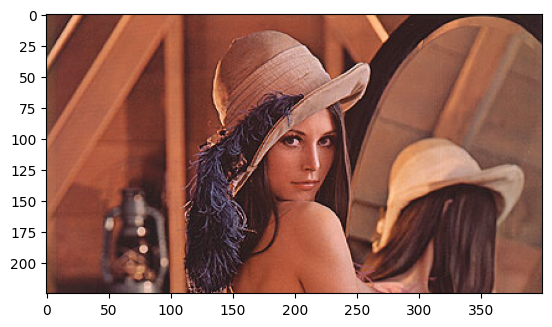

In [3]:
wide_img = cv2.imread('lena.jpg', cv2.IMREAD_COLOR)
wide_img = cv2.cvtColor(wide_img, cv2.COLOR_BGR2RGB)
plt.imshow(wide_img)
plt.show()

In [4]:
wide_img.shape

(225, 400, 3)

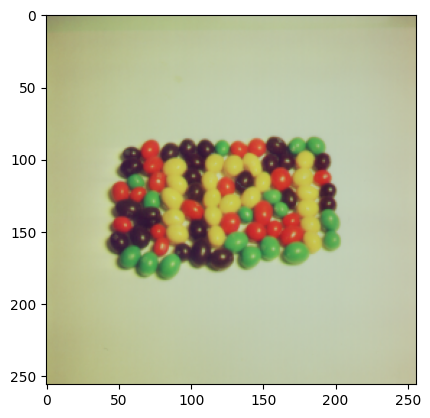

In [5]:
tall_img = cv2.imread('misc/4.1.07.tiff', cv2.IMREAD_COLOR)
tall_img = cv2.cvtColor(tall_img, cv2.COLOR_BGR2RGB)
plt.imshow(tall_img)
plt.show()

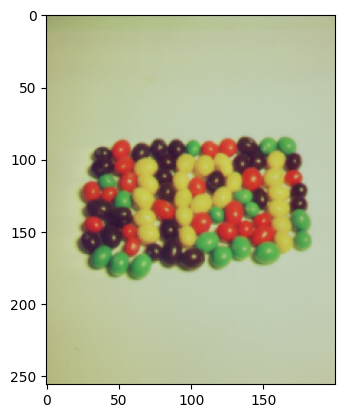

In [6]:
tall_img = tall_img[: , 20: 220, :]
plt.imshow(tall_img)
plt.show()

In [7]:
tall_img.shape

(256, 200, 3)

In [8]:
cv2.imwrite('ps0-1-a-1.png', tall_img)
cv2.imwrite('ps0-1-a-2.png', wide_img)

True

## Color Planes

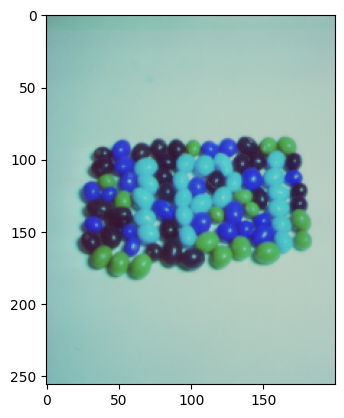

In [9]:
tall_img_red_blue = tall_img.copy()
tall_img_red_blue[:, :, 0] = tall_img[:, :, 2]
tall_img_red_blue[:, :, 2] = tall_img[:, :, 0]
plt.imshow(tall_img_red_blue)
plt.show()

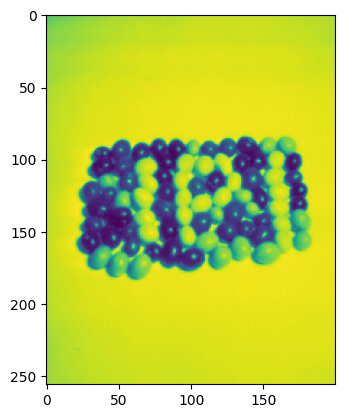

In [10]:
green_channel = tall_img[:, :, 1]
plt.imshow(green_channel)
plt.show()

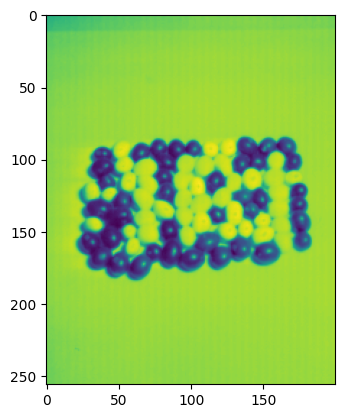

In [11]:
red_tall_image = tall_img[:, :, 0]
plt.imshow(red_tall_image)
plt.show()

red channel looks more informative and less noisy

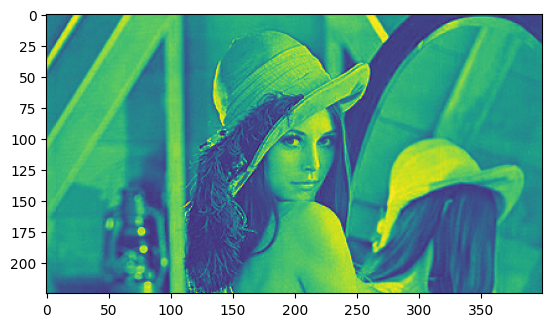

In [12]:
red_wide_image = wide_img[:, :, 0]
plt.imshow(red_wide_image)
plt.show()

In [13]:
red_wide_image.shape

(225, 400)

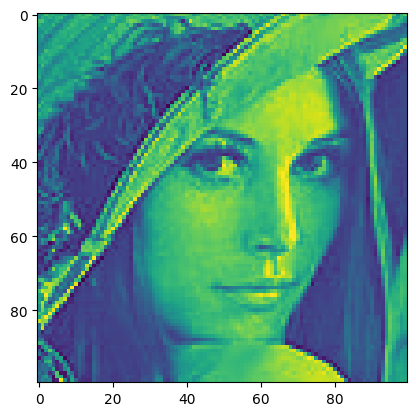

In [14]:
center = (wide_img.shape[0]//2, wide_img.shape[1]//2)
top_left_y = max(center[0] - 100 // 2, 0)
top_left_x = max(center[1] - 100 // 2, 0)
bottom_right_y = min(center[0] + 100 // 2, wide_img.shape[0])
bottom_right_x = min(center[1] + 100 // 2, wide_img.shape[1])
center_square = red_wide_image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
plt.imshow(center_square)
plt.show()

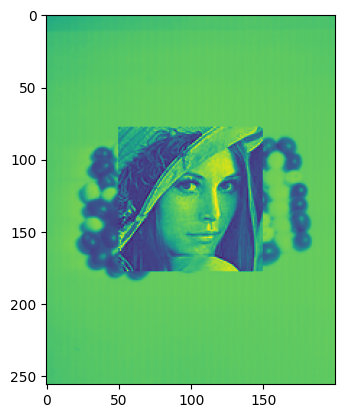

In [15]:
center_tall_img = (tall_img.shape[0]//2, tall_img.shape[1]//2)
top_left_y = max(center_tall_img[0] - 100 // 2, 0)
top_left_x = max(center_tall_img[1] - 100 // 2, 0)
bottom_right_y = min(center_tall_img[0] + 100 // 2, tall_img.shape[0])
bottom_right_x = min(center_tall_img[1] + 100 // 2, tall_img.shape[1])
red_tall_image[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = center_square
plt.imshow(red_tall_image)
plt.show()

## Arithmetic Operators

In [16]:
print('wide image green channel max: ', np.max(green_channel))
print('wide image green channel min: ', np.min(green_channel))

wide image green channel max:  212
wide image green channel min:  19


In [17]:
mean_pixel = np.mean(green_channel)
std_pixel = np.std(green_channel)
print('wide image green channel mean: ', mean_pixel)
print('wide image green channel std: ', std_pixel)

wide image green channel mean:  177.32287109375
wide image green channel std:  50.03725440584816


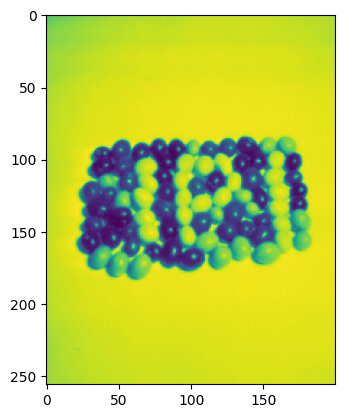

In [25]:
normalized_green_channel = (green_channel - mean_pixel) / std_pixel
scaled_normalized_green_channel = normalized_green_channel * 10
plt.imshow(scaled_normalized_green_channel)
plt.show()

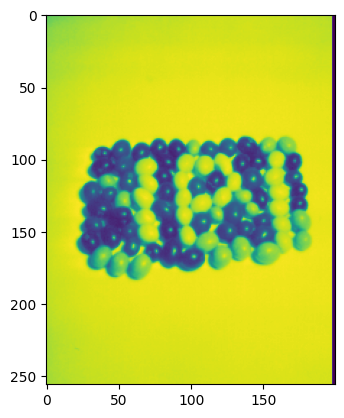

In [26]:
shifted_img = np.zeros(green_channel.shape, dtype=np.uint8)
shifted_img[:, :-2] = green_channel[:,:-2]
plt.imshow(shifted_img)
plt.show()

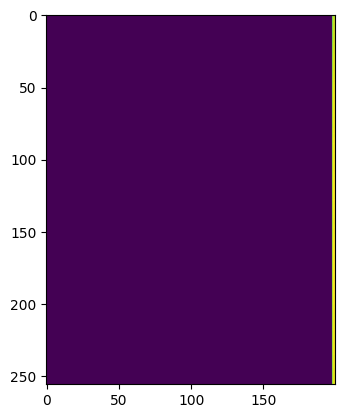

In [27]:
subtracted_img = cv2.subtract(green_channel, shifted_img)
plt.imshow(subtracted_img)
plt.show()

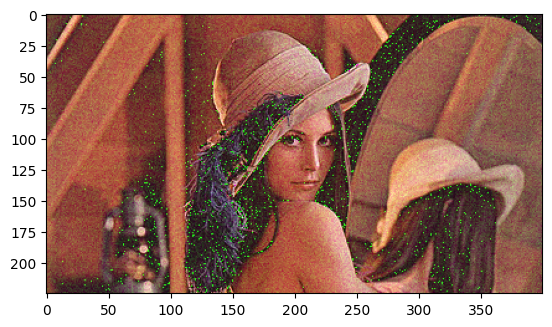

In [44]:
sigma = 20
noise = np.random.normal(scale=sigma, size=wide_img.shape[:2])
noisy_img = wide_img.copy()
noisy_img[:, :, 1] = wide_img[:, :, 1] + noise
plt.imshow(noisy_img)
plt.show()

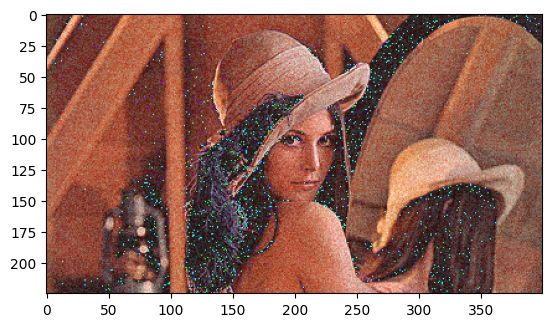

In [45]:
blue_noisy_img = noisy_img.copy()
blue_noisy_img[:, :, 2] = wide_img[:, :, 2] + noise
plt.imshow(blue_noisy_img)
plt.show()